In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import statistics
from sklearn.model_selection import train_test_split
import random
import sklearn
from sklearn import ensemble
from itertools import chain
from typing import TextIO
import re
import seaborn as sns
from scipy import stats

In [2]:
genes = ['RPS14', 'CDC5L', 'POLR2I', 'RPS7', 'XAB2', 'RPS19BP1', 'RPL23A', 'SUPT6H', 'PRPF31', 'U2AF1', 'PSMD7',
         'Hsp10', 'RPS13', 'PHB', 'RPS9', 'EIF5B', 'RPS6', 'RPS11', 'SUPT5H', 'SNRPD2', 'RPL37', 'RPSA', 'COPS6',
         'DDX51', 'EIF4A3', 'KARS', 'RPL5', 'RPL32', 'SF3A1', 'RPS3A', 'SF3B3', 'POLR2D', 'RPS15A', 'RPL31', 'PRPF19',
         'SF3B2', 'RPS4X', 'CSE1L', 'RPL6', 'COPZ1', 'PSMB2', 'RPL7', 'PHB2', 'ARCN1', 'RPA2', 'NUP98', 'RPS3', 'EEF2',
         'USP39', 'PSMD1', 'NUP93', 'AQR', 'RPL34', 'PSMA1', 'RPS27A']

genes_filter_1 = ['RPS6', 'PRPF19', 'RPL34', 'Hsp10', 'POLR2I', 'EIF5B', 'RPL31',
       'RPS3A', 'CSE1L', 'XAB2', 'PSMD7', 'SUPT6H', 'EEF2', 'RPS11',
       'SNRPD2', 'RPL37', 'SF3B3', 'DDX51', 'RPL7', 'RPS9', 'KARS',
       'SF3A1', 'RPL32', 'PSMB2', 'RPS7', 'EIF4A3', 'U2AF1', 'PSMA1',
       'PHB', 'POLR2D', 'RPSA', 'RPL23A', 'NUP93', 'AQR', 'RPA2',
       'SUPT5H', 'RPL6', 'RPS13', 'SF3B2', 'RPS27A', 'PRPF31', 'COPZ1',
       'RPS4X', 'PSMD1', 'RPS14', 'NUP98', 'USP39', 'CDC5L', 'RPL5',
       'PHB2', 'RPS15A', 'RPS3', 'ARCN1', 'COPS6']

# gene length and sort by length
f_gene_len = '../data/gene_lengths.csv'
df_g_len = pd.read_csv(f_gene_len,header=None,names=['gene','id','length'])
df_g_len = df_g_len[df_g_len['gene'].isin(genes_filter_1)]
df_len_sort = df_g_len.sort_values(by=['length'])
genes_ordered = df_len_sort['gene'].values #gene list ordered by length
genes_len_ordered = df_len_sort['length'].values #gene length list
print(len(genes_ordered))

54


In [3]:
genes_ordered

array(['RPS15A', 'RPL31', 'RPS13', 'RPS11', 'SNRPD2', 'RPS9', 'RPS7',
       'RPS14', 'RPS6', 'RPL7', 'POLR2I', 'RPL34', 'RPS3A', 'U2AF1',
       'Hsp10', 'RPS4X', 'RPL6', 'RPL23A', 'RPL5', 'RPS27A', 'RPSA',
       'COPS6', 'PHB2', 'PSMA1', 'RPL37', 'RPL32', 'PSMD7', 'EIF4A3',
       'RPA2', 'PHB', 'COPZ1', 'RPS3', 'PRPF31', 'KARS', 'USP39',
       'POLR2D', 'PRPF19', 'XAB2', 'SF3B2', 'NUP93', 'EEF2', 'PSMD1',
       'CSE1L', 'SUPT5H', 'ARCN1', 'EIF5B', 'DDX51', 'PSMB2', 'AQR',
       'SF3A1', 'CDC5L', 'SUPT6H', 'NUP98', 'SF3B3'], dtype=object)

## pooled guide top 20%, ratio 0.45 cutoff

126175
25311


<Figure size 432x288 with 0 Axes>

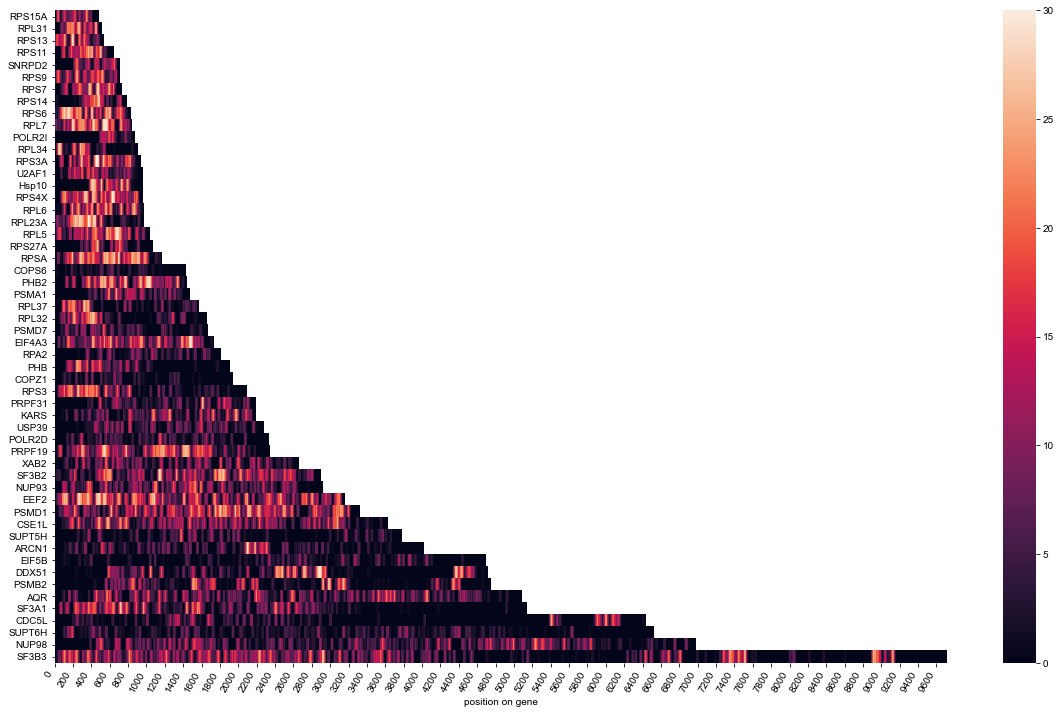

In [4]:
dataframe = pd.read_csv('../data/d14_plasmid_library_ratio_targeting_library.csv',header=None)
dataframe.columns =['guide','gene', 'gene_id', 'pos', 'raw ratio']
dataframe = dataframe[dataframe['gene'].isin(genes_filter_1)] #filter out 1 gene
print(len(dataframe))
df_good = dataframe[dataframe['raw ratio']<0.45]
print(len(df_good))

plt.clf()
plt.rcParams['svg.fonttype'] = 'none'
# change font
plt.rcParams['font.sans-serif'] = "Arial"
f = plt.figure(figsize=(20,12))

hist_all = [] #all genes
pos_goodn_all = []
df_all = []
for i in range(54):
    t = genes_ordered[i]
    length = genes_len_ordered[i]
    t_df_gene_good = df_good[df_good['gene']==t]    
    pos_good = t_df_gene_good['pos'].values
    pos_num_all = [] #good guide number in each position
    hist_t = np.zeros(31) # pos/guide number in each cluster bin
    for p in range(length): #pos
        pos_num = 0 #good guide number at this position
        for pn in range(p-29,p+1):
            if pn in pos_good: #good guide at this pos
                pos_num += 1
        pos_num_all.append(pos_num)
        hist_t[pos_num]+= 1
    df_g = pd.DataFrame(columns = np.arange(length), index = [t])
    df_g.loc[t] = pos_num_all
    #df_g[t].plot.hist(bins=30)
    #hist, bin_edges = np.histogram(pos_num_all, bins = )
    df_all.append(df_g)
    pos_goodn_all = pos_goodn_all+pos_num_all
    hist_all.append(hist_t)

allgene_df = pd.concat(df_all)
hp = sns.heatmap(allgene_df.astype(float),xticklabels=200,cmap='rocket')
hp.set_xticklabels(hp.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.xlabel('position on gene')
#plt.title('good guide distribution along gene position')

plt.savefig("../a_figures/guide_clustering_ratio045good_ordered_by_length.svg",format="svg")

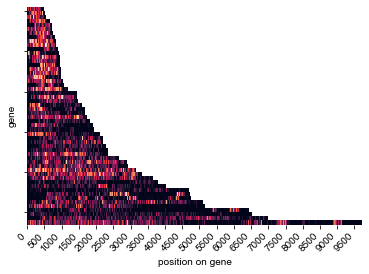

In [20]:
#smaller figure
plt.clf()
hp = sns.heatmap(allgene_df.astype(float),xticklabels=500,cmap='rocket',vmin=0,vmax=30,cbar=False)
hp.set_xticklabels(hp.get_xticklabels(), rotation=45, horizontalalignment='right')
#hp.set_yticks([])
hp.set_yticks(np.arange(1,55,step=10))
hp.set_yticklabels([])
plt.xlabel('position on gene')
plt.ylabel('gene')
plt.savefig("../a_figures/guide_clustering_ratio045good_ordered_by_length2.png",dpi=1000)

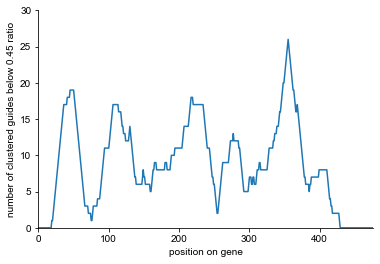

In [9]:
#select transcript and plot
t = 'RPS15A'
t_df = dataframe[dataframe['gene']==t]
length = genes_len_ordered[0]
t_df_gene_good = df_good[df_good['gene']==t]    
pos_good = t_df_gene_good['pos'].values
pos_num_all = [] #good guide number in each position
#hist_t = np.zeros(31) # pos/guide number in each cluster bin
for p in range(length): #pos
    pos_num = 0 #good guide number at this position
    for pn in range(p-29,p+1):
        if pn in pos_good: #good guide at this pos
            pos_num += 1
    pos_num_all.append(pos_num)
    #hist_t[pos_num]+= 1
    
#df_g = pd.DataFrame(columns = np.arange(length), index = [t])
#df_g.loc[t] = pos_num_all

plt.clf()
plt.plot(np.arange(length),pos_num_all)
plt.xlim(0,length)
plt.ylim(0,30)
sns.despine(left=False, bottom=False)
plt.xlabel('position on gene')
plt.ylabel('number of clustered guides below 0.45 ratio')
plt.savefig("../a_figures/guide clustering ratio045 good_"+t+".svg",format="svg")

<Figure size 432x288 with 0 Axes>

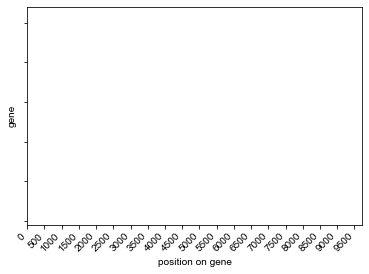

In [10]:
# just tickers
plt.clf()
fig,ax = plt.subplots()
ax.set_xticks(np.arange(0,max(genes_len_ordered),step=500))
ax.set_xticklabels(np.arange(0,max(genes_len_ordered),step=500), rotation=45, horizontalalignment='right')
ax.set_xlim(0,max(genes_len_ordered))
ax.set_yticks(np.arange(1,55,step=10))
ax.set_yticklabels([])
ax.set_ylim(0,55)
plt.xlabel('position on gene')
plt.ylabel('gene')
plt.savefig("../a_figures/guide_clustering_ratio045good_ordered_ticks.svg")

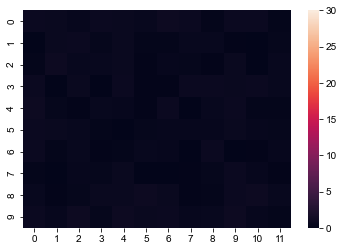

In [2]:
plt.clf()
plt.rcParams['svg.fonttype'] = 'none'
# change font
plt.rcParams['font.sans-serif'] = "Arial"
uniform_data = np.random.rand(10, 12)
sns.heatmap(uniform_data,vmin=0, vmax=30)
plt.savefig("../a_figures/guide_clustering_heatmapbar.svg")

In [7]:
np.sum(np.array(hist_all),axis=0)

array([39726.,  9300.,  7617.,  6965.,  6394.,  5966.,  5607.,  5032.,
        4493.,  4092.,  3680.,  3483.,  3096.,  2915.,  2522.,  2393.,
        2158.,  1841.,  1746.,  1568.,  1265.,  1167.,  1148.,   974.,
         801.,   664.,   422.,   350.,   263.,   156.,    95.])

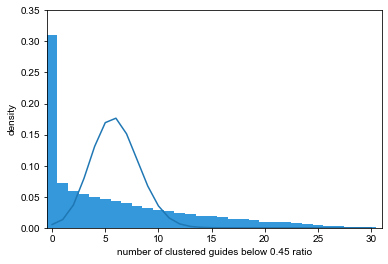

In [14]:
#summary of clustered guide number
plt.clf()
#plt.figsize=(20,30)
plt.bar(np.arange(0,31),np.sum(np.array(hist_all),axis=0)/np.sum(np.array(hist_all)), width=1.0,
        #color=sns.color_palette("rocket",31),
       color="#3498db")

#random choose 20% guides for "null" distribution
hist_all = []
for tt in range(100):#sample 100 times
    df_good = dataframe.sample(n=25311)
    pos_goodn_all = []
    df_all = []
    for i in range(54):
        t = genes_ordered[i]
        length = genes_len_ordered[i]
        t_df_gene_good = df_good[df_good['gene']==t]    
        pos_good = t_df_gene_good['pos'].values
        pos_num_all = [] #good guide number in each position
        for p in range(length): #pos
            pos_num = 0 #good guide number at this position
            for pn in range(p-29,p+1):
                if pn in pos_good: #good guide at this pos
                    pos_num += 1
            pos_num_all.append(pos_num)
        df_g = pd.DataFrame(columns = np.arange(length), index = [t])
        df_g.loc[t] = pos_num_all
        #df_g[t].plot.hist(bins=30)
        #hist, bin_edges = np.histogram(pos_num_all, bins = np.arange(0,32),density=True)
        df_all.append(df_g)
        pos_goodn_all = pos_goodn_all+pos_num_all
    allgene_df = pd.concat(df_all)
    hist, bin_edges = np.histogram(pos_goodn_all, bins = np.arange(0,32),density=True)
    #plt.hist(pos_goodn_all,bins=np.arange(0,32),density=True)
    hist_all.append(hist)
    
hist_avg = np.mean(np.array(hist_all),axis=0)
plt.plot(np.arange(0,31),hist_avg)
plt.ylim(0,0.35)
plt.xlim(-0.5,31)
plt.xlabel('number of clustered guides below 0.45 ratio')
plt.ylabel('density')
plt.savefig("../a_figures/guide_clustering_hist_ratio045good_with_random3.svg",format="svg")

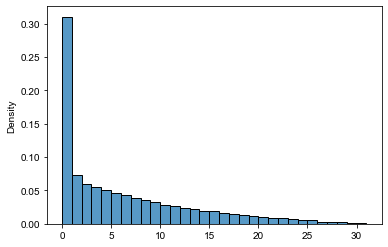

In [23]:
sns.histplot(
    pos_goodn_all,bins=np.arange(0,32),stat='density',palette="Blues")

(-0.5, 31.0)

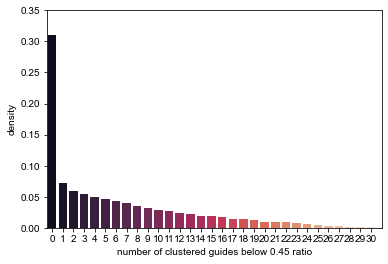

In [29]:
sns.barplot(x=np.arange(0,31),y=np.sum(np.array(hist_all),axis=0)/np.sum(np.array(hist_all)),palette="rocket")
plt.xlabel('number of clustered guides below 0.45 ratio')
plt.ylabel('density')
plt.ylim(0,0.35)
plt.xlim(-0.5,31)

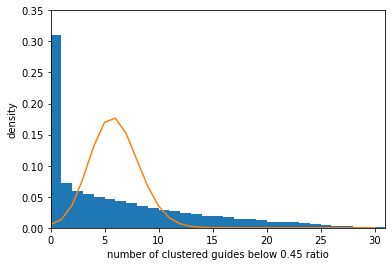

In [12]:
#summary of clustered guide number
#hist, bin_edges = np.histogram(pos_goodn_all,bins=np.arange(0,31))
#np.histogram(pos_goodn_all,bins=np.arange(0,32))
plt.clf()
plt.hist(pos_goodn_all,bins=np.arange(0,32),density=True)
plt.xlabel('number of clustered guides below 0.45 ratio')
plt.ylabel('density')
plt.ylim(0,0.35)
plt.xlim(0,31)
#plt.savefig("../a_figures/guide_clustering_hist_ratio045good.svg",format="svg")

#random choose 20% guides for "null" distribution
hist_all = []
for tt in range(100):#sample 100 times
    df_good = dataframe.sample(n=25311)
    pos_goodn_all = []
    df_all = []
    for i in range(54):
        t = genes_ordered[i]
        length = genes_len_ordered[i]
        t_df_gene_good = df_good[df_good['gene']==t]    
        pos_good = t_df_gene_good['pos'].values
        pos_num_all = [] #good guide number in each position
        for p in range(length): #pos
            pos_num = 0 #good guide number at this position
            for pn in range(p-29,p+1):
                if pn in pos_good: #good guide at this pos
                    pos_num += 1
            pos_num_all.append(pos_num)
        df_g = pd.DataFrame(columns = np.arange(length), index = [t])
        df_g.loc[t] = pos_num_all
        #df_g[t].plot.hist(bins=30)
        #hist, bin_edges = np.histogram(pos_num_all, bins = np.arange(0,32),density=True)
        df_all.append(df_g)
        pos_goodn_all = pos_goodn_all+pos_num_all
    allgene_df = pd.concat(df_all)
    hist, bin_edges = np.histogram(pos_goodn_all, bins = np.arange(0,32),density=True)
    #plt.hist(pos_goodn_all,bins=np.arange(0,32),density=True)
    hist_all.append(hist)
    
hist_avg = np.mean(np.array(hist_all),axis=0)
plt.plot(np.arange(0,31),hist_avg)
plt.ylim(0,0.35)
plt.xlim(0,31)
plt.xlabel('number of clustered guides below 0.45 ratio')
plt.ylabel('density')
plt.savefig("../a_figures/guide_clustering_hist_ratio045good_with_random.svg",format="svg")

## gene top 20%, 0.75 ratio filtered

In [17]:
dataset_filtered_csv_path = '../data/integrated_guide_feature_filtered_f24_mismatch3_all_features.csv'

#dataset
dataframe = pd.read_csv(dataset_filtered_csv_path)
dataframe = dataframe[dataframe['gene'].isin(genes_filter_1)] #filter out 1 gene

num_examples = len(dataframe['gene'].values)
df_good = dataframe[dataframe['binary_relative_ratio_075f']==1]
len(df_good)
#gene top 20%
#df_good_gene = dataframe[dataframe['relative_ratio']<=0.2]

21438

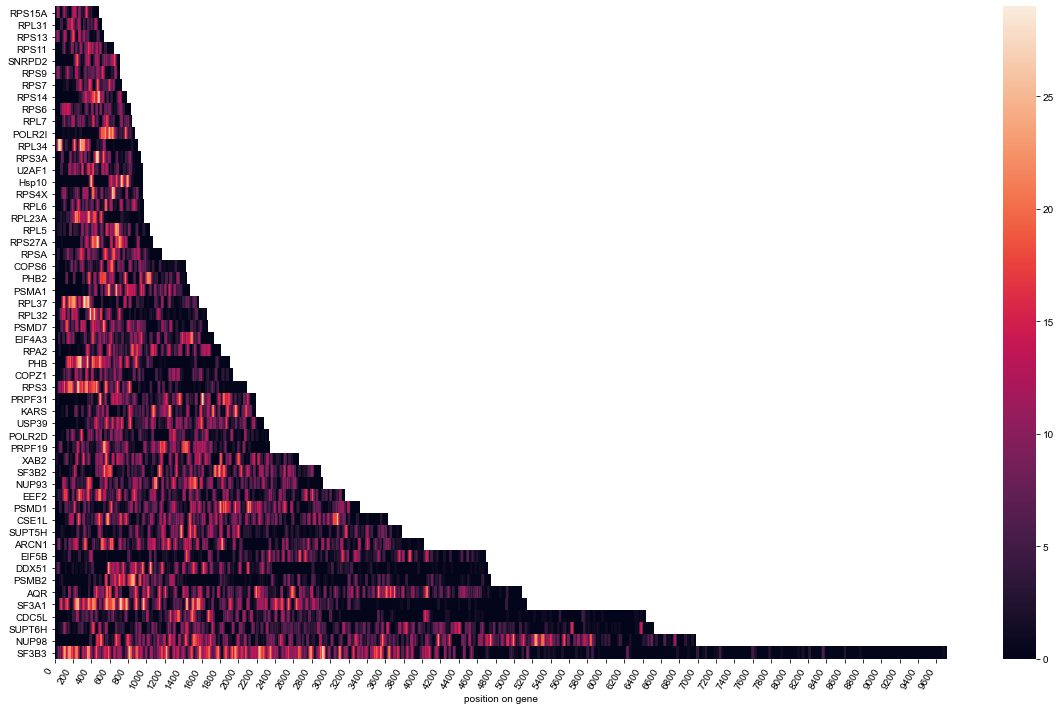

In [18]:
f = plt.figure(figsize=(20,12))

hist_all = [] #all genes
pos_goodn_all = []
df_all = []
for i in range(54):
    #t = genes[i]
    t = genes_ordered[i]
    length = genes_len_ordered[i]
    t_df_gene_good = df_good[df_good['gene']==t]    
    pos_good = t_df_gene_good['pos'].values
    pos_num_all = [] #good guide number in each position
    hist_t = np.zeros(31) # pos/guide number in each cluster bin
    for p in range(length): #pos
        pos_num = 0
        for pn in range(p-29,p+1):
            if pn in pos_good: #good guide at this pos
                pos_num += 1
        pos_num_all.append(pos_num)
        hist_t[pos_num]+= 1
    #df_g = pd.DataFrame(columns = np.linspace(0, length-1, num=length), index = [t])
    df_g = pd.DataFrame(columns = np.arange(length), index = [t])
    df_g.loc[t] = pos_num_all
    df_all.append(df_g)
    pos_goodn_all = pos_goodn_all+pos_num_all
    #df_all_hist.loc[t] = pos_num_all
    hist_all.append(hist_t)
    

allgene_df = pd.concat(df_all)
hp = sns.heatmap(allgene_df.astype(float),xticklabels=200,cmap='rocket')
hp.set_xticklabels(hp.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.xlabel('position on gene')
#plt.title('good guide distribution along gene position')

plt.savefig("../a_figures/guide_clustering_new_goodguide_ordered_by_length.svg",format="svg")

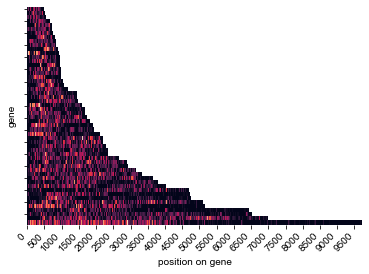

In [6]:
#smaller figure
plt.clf()
hp = sns.heatmap(allgene_df.astype(float),xticklabels=500,cmap='rocket',vmin=0,vmax=30,cbar=False)
hp.set_xticklabels(hp.get_xticklabels(), rotation=45, horizontalalignment='right')
hp.set_yticklabels([])
#hp.set_yticks([])
plt.xlabel('position on gene')
plt.ylabel('gene')
plt.savefig("../a_figures/guide_clustering_new_goodguide_ordered_by_length2.png",dpi=1000)

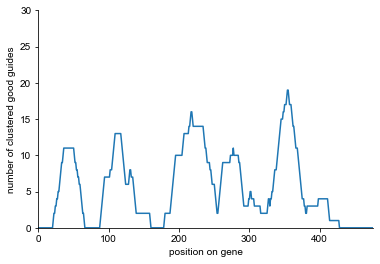

In [13]:
#select transcript and plot
t = 'RPS15A'
t_df = dataframe[dataframe['gene']==t]
length = genes_len_ordered[0]
t_df_gene_good = df_good[df_good['gene']==t]    
pos_good = t_df_gene_good['pos'].values
pos_num_all = [] #good guide number in each position
#hist_t = np.zeros(31) # pos/guide number in each cluster bin
for p in range(length): #pos
    pos_num = 0 #good guide number at this position
    for pn in range(p-29,p+1):
        if pn in pos_good: #good guide at this pos
            pos_num += 1
    pos_num_all.append(pos_num)
    #hist_t[pos_num]+= 1

plt.clf()
plt.plot(np.arange(length),pos_num_all)
plt.xlim(0,length)
plt.ylim(0,30)
sns.despine(left=False, bottom=False)
plt.xlabel('position on gene')
plt.ylabel('number of clustered good guides')
plt.savefig("../a_figures/guide clustering new good_"+t+".svg",format="svg")

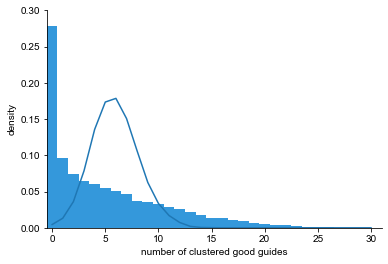

In [19]:
#summary of clustered guide number
plt.clf()

plt.bar(np.arange(0,31),np.sum(np.array(hist_all),axis=0)/np.sum(np.array(hist_all)), width=1.0,
        #color=sns.color_palette("rocket",31),
       color="#3498db")
sns.despine(left=False, bottom=False)
plt.ylim(0,0.3)
plt.xlim(-0.5,31)
#plt.savefig("../a_figures/guide_clustering_hist_ratio_gene20_good3.svg",format="svg")

#random choose 20% guides for "null" distribution
import random

hist_all = []
for tt in range(100):#sample 100 times
    seq_pos = np.arange(1000)
    pos_good = random.sample(list(seq_pos), 200)
    pos_num_all = [] #good guide number in each position
    for p in range(1000): #pos
        pos_num = 0 #good guide number at this position
        for pn in range(p-29,p+1):
            if pn in pos_good: #good guide at this pos
                pos_num += 1
        pos_num_all.append(pos_num)
    hist, bin_edges = np.histogram(pos_num_all, bins = np.arange(0,32),density=True)
    #plt.hist(pos_goodn_all,bins=np.arange(0,32),density=True)
    hist_all.append(hist)
        
hist_avg = np.mean(np.array(hist_all),axis=0)
plt.plot(np.arange(0,31),hist_avg)
plt.ylim(0,0.3)
plt.xlim(-0.5,31)
plt.xlabel('number of clustered good guides')
plt.ylabel('density')
plt.savefig("../a_figures/guide_clustering_hist_ratio_gene20_good4.svg",format="svg")


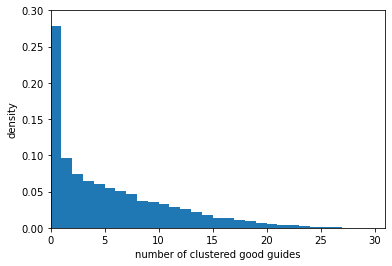

In [17]:
#summary of clustered guide number
plt.clf()
plt.hist(pos_goodn_all,bins=np.arange(0,32),density=True)
plt.xlabel('number of clustered good guides')
plt.ylabel('density')
plt.ylim(0,0.3)
plt.xlim(0,31)
plt.savefig("../a_figures/guide_clustering_hist_ratio_gene20_good.svg",format="svg")

In [ ]:
plt.clf()    
#plt.figure(figsize=(25,20))
#sns.heatmap(df_all_hist.astype(float))
clustergrid = sns.clustermap(df_all_hist.astype(float),col_cluster=False, figsize=(30,20))
sort_gene_list = clustergrid.dendrogram_row.reordered_ind
#plt.title('positional distribution of good guides in each gene')
#plt.show()
#plt.savefig("a_figures/guide_clustering_new_goodguide.svg",format="svg")

In [3]:
genes_ordered = []
cluster_index = [5,
 32,
 33,
 12,
 17,
 3,
 19,
 14,
 11,
 0,
 2,
 16,
 22,
 41,
 40,
 1,
 39,
 27,
 38,
 29,
 31,
 52,
 9,
 6,
 23,
 15,
 42,
 53,
 20,
 18,
 24,
 44,
 21,
 10,
 25,
 8,
 48,
 34,
 13,
 4,
 35,
 49,
 50,
 7,
 43,
 37,
 45,
 51,
 47,
 46,
 28,
 30,
 36,
 26,
 54]
for i in cluster_index:
    genes_ordered.append(genes[i])

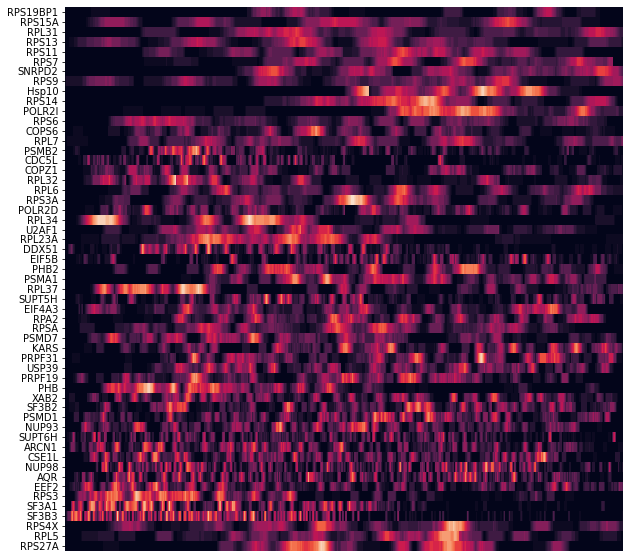

In [5]:
#positional good guide number
#all transcripts

f = plt.figure(figsize=(10,10))

for i in range(55):
    #t = genes[i]
    t = genes_ordered[i]
    t_df_gene_good = df_good[df_good['gene']==t]    
    pos_good = t_df_gene_good['pos'].values
    pos_all = dataframe[dataframe['gene']==t]['pos'].values
    pos_num = {} #good guide number in each position
    for p in pos_all:
        pos_num[p]=0
        for pn in range(p-29,p+1):
            if pn in pos_good: #good guide at this pos
                pos_num[p] += 1
    df_g = pd.DataFrame.from_dict(pos_num, orient='index',columns=[t])
    df_g = df_g.sort_index()
    df_g = df_g.transpose()
    #ax2 = f.add_subplot(56,1,(i+1))
    ax2 = f.add_subplot(55,1,(i+1))
    #if i ==54:
    #    cbar_axp = f.add_subplot(56,1,56)
    #    sns.heatmap(df_g,xticklabels=False,yticklabels=[t],cbar_kws={"orientation": "horizontal"},cbar=True,cbar_ax=cbar_axp,vmax=59,ax=ax2)
    #    ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)
    #else:
    sns.heatmap(df_g,xticklabels=False,yticklabels=[t],cbar_kws={"orientation": "horizontal"},cbar=False,vmax=30,ax=ax2)
    ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)
        #break
    #df_g[t].plot.hist(bins=60)
    
plt.subplots_adjust(hspace=.0)

#plt.title('positional distribution of good guides in each gene')
#plt.show()
plt.savefig("a_figures/guide_clustering_new_goodguide.svg",format="svg")

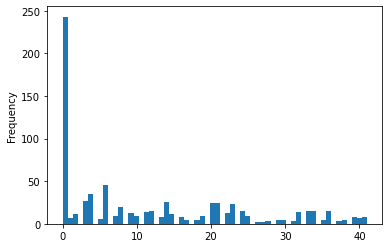

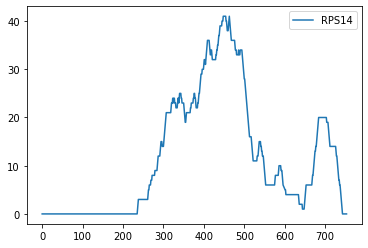

In [36]:
#positional good guide number
#examples

#f = plt.figure(figsize=(10,15))

for i in range(55):
    t = genes[i]
    t_df_gene_good = df_good[df_good['gene']==t]    
    pos_good = t_df_gene_good['pos'].values
    pos_all = dataframe[dataframe['gene']==t]['pos'].values
    pos_num = {} #good guide number in each position
    for p in pos_all:
        pos_num[p]=0
        for pn in range(p-29,p+30):
            if pn in pos_good: #good guide at this pos
                pos_num[p] += 1
    df_g = pd.DataFrame.from_dict(pos_num, orient='index',columns=[t])
    df_g = df_g.sort_index()
    #df_g = df_g.transpose()
    df_g[t].plot.hist(bins=60)
    df_g.plot()
    break

/Users/jingyiwei/miniconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 432x288 with 0 Axes>

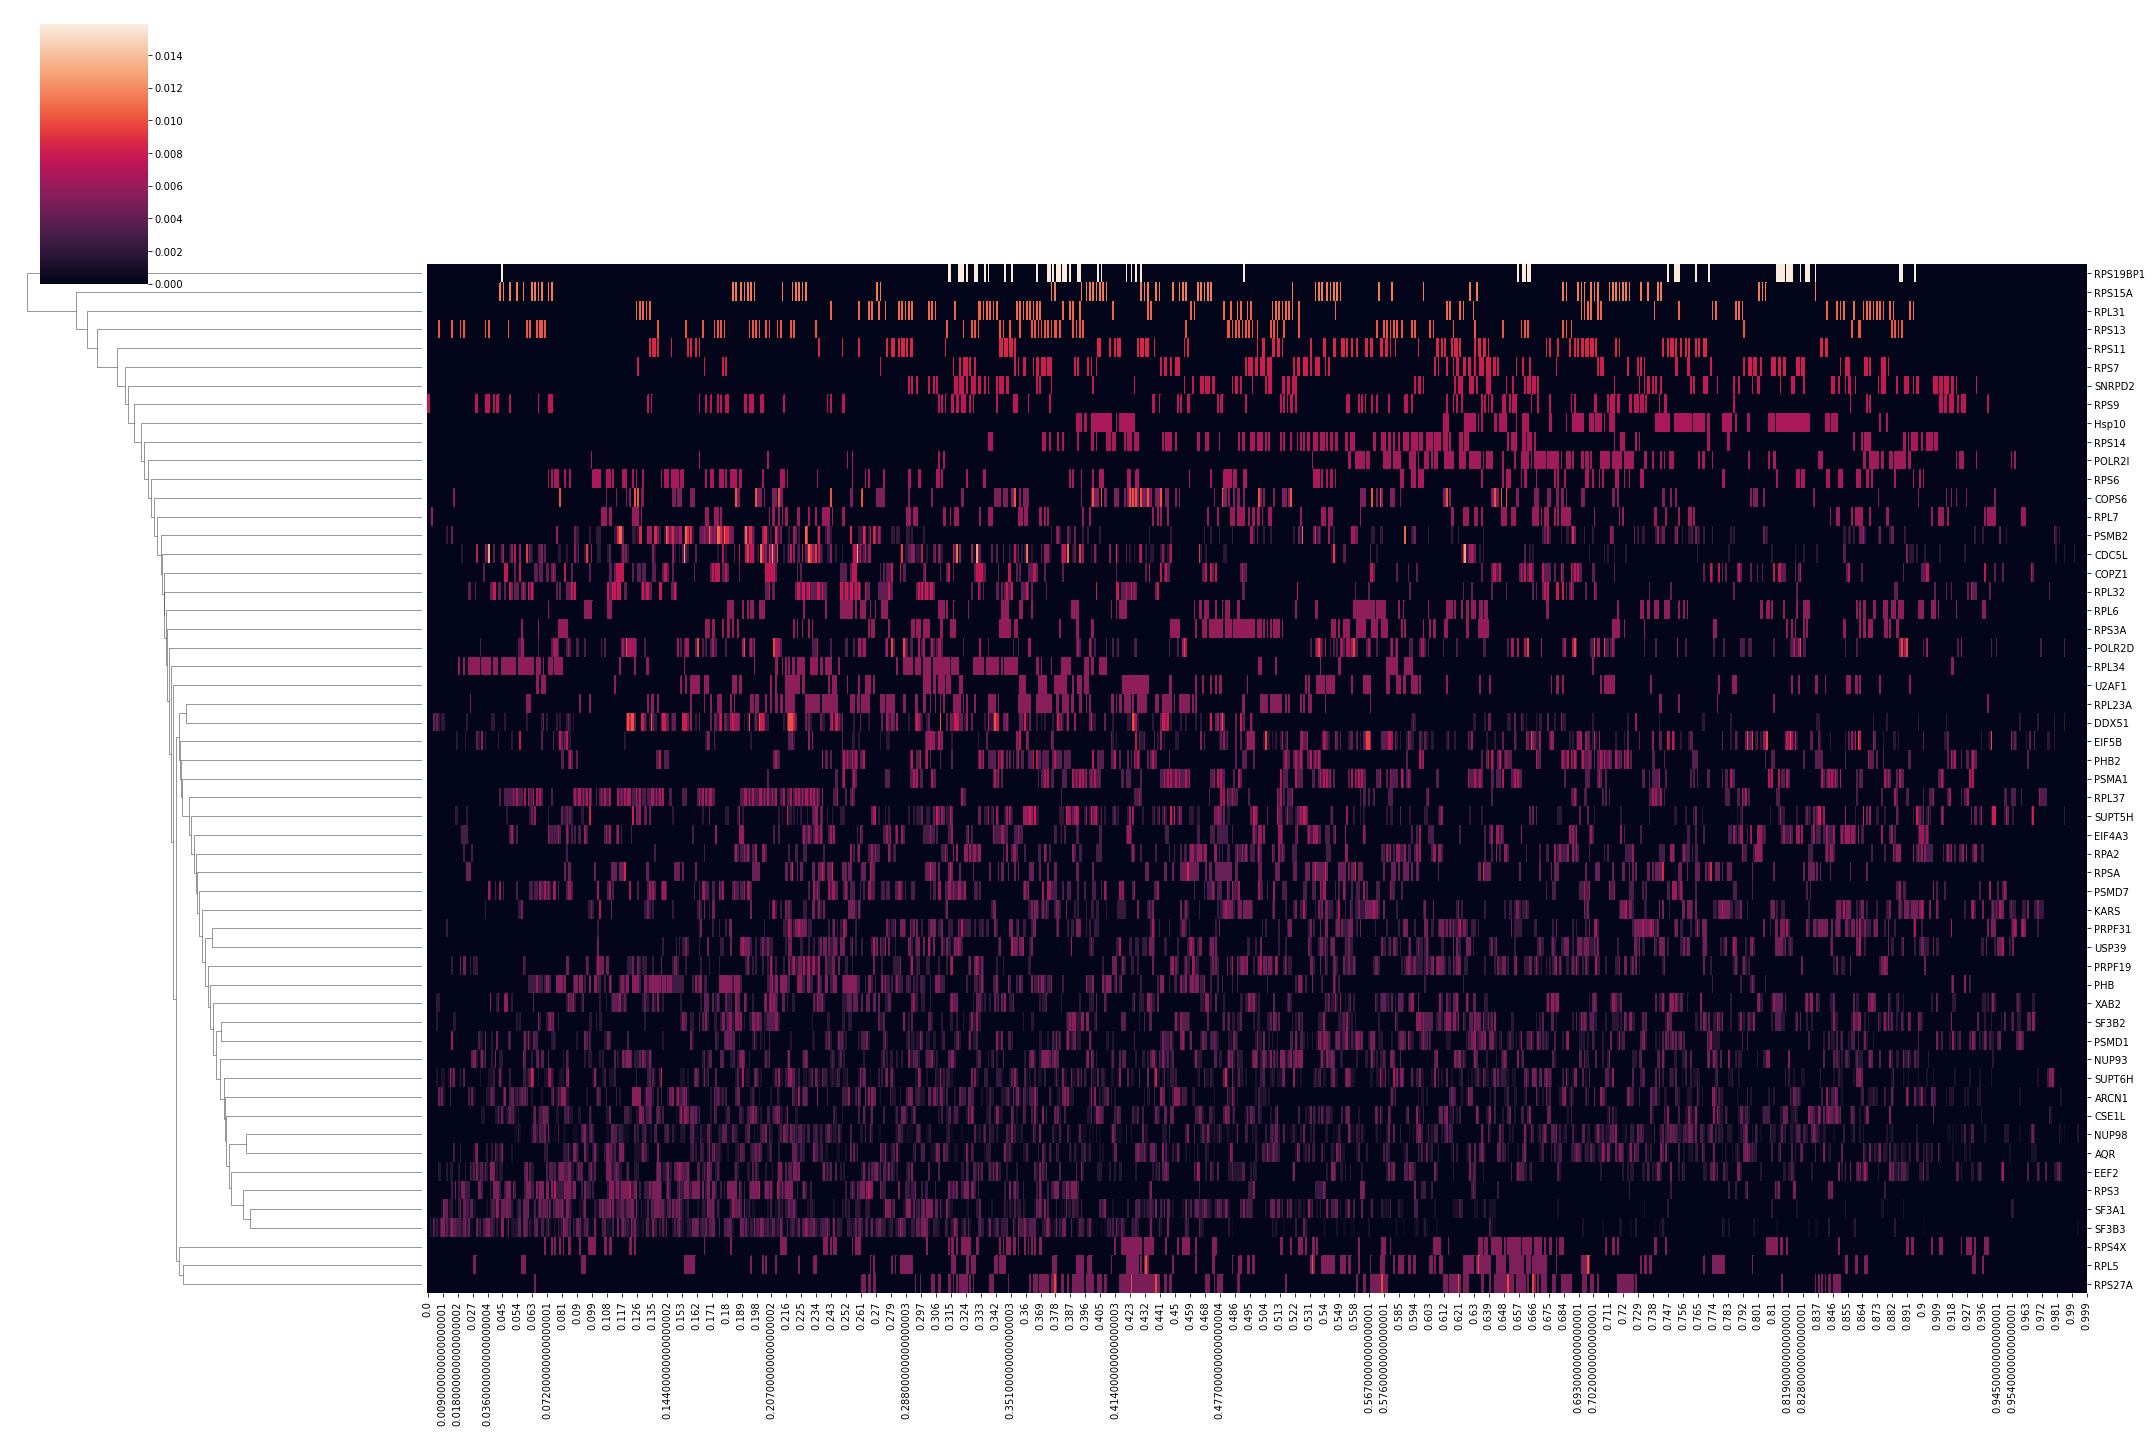

In [6]:
#all transcripts

df_all_hist = pd.DataFrame(columns = np.linspace(0, 0.999, num=1000), index = genes)
#gene top 20% and ratio 0.75 cutoff
for t in genes:
    t_df_gene_good = df_good[df_good['gene']==t]    
    pos_normed = t_df_gene_good['position'].values
    hist, bin_edges = np.histogram(pos_normed,bins=np.linspace(0, 1.0, num=1001))
    hist_normed = hist/len(t_df_gene_good['guide'].values)
    df_all_hist.loc[t] = hist_normed
plt.clf()    
#plt.figure(figsize=(25,20))
#sns.heatmap(df_all_hist.astype(float))
clustergrid = sns.clustermap(df_all_hist.astype(float),col_cluster=False, figsize=(30,20))
sort_gene_list = clustergrid.dendrogram_row.reordered_ind
#plt.title('positional distribution of good guides in each gene')
#plt.show()
#plt.savefig("a_figures/guide_clustering_new_goodguide.svg",format="svg")

In [7]:
sort_gene_list

[5,
 32,
 33,
 12,
 17,
 3,
 19,
 14,
 11,
 0,
 2,
 16,
 22,
 41,
 40,
 1,
 39,
 27,
 38,
 29,
 31,
 52,
 9,
 6,
 23,
 15,
 42,
 53,
 20,
 18,
 24,
 44,
 21,
 10,
 25,
 8,
 48,
 34,
 13,
 4,
 35,
 49,
 50,
 7,
 43,
 37,
 45,
 51,
 47,
 46,
 28,
 30,
 36,
 26,
 54]

<Figure size 2160x1440 with 0 Axes>

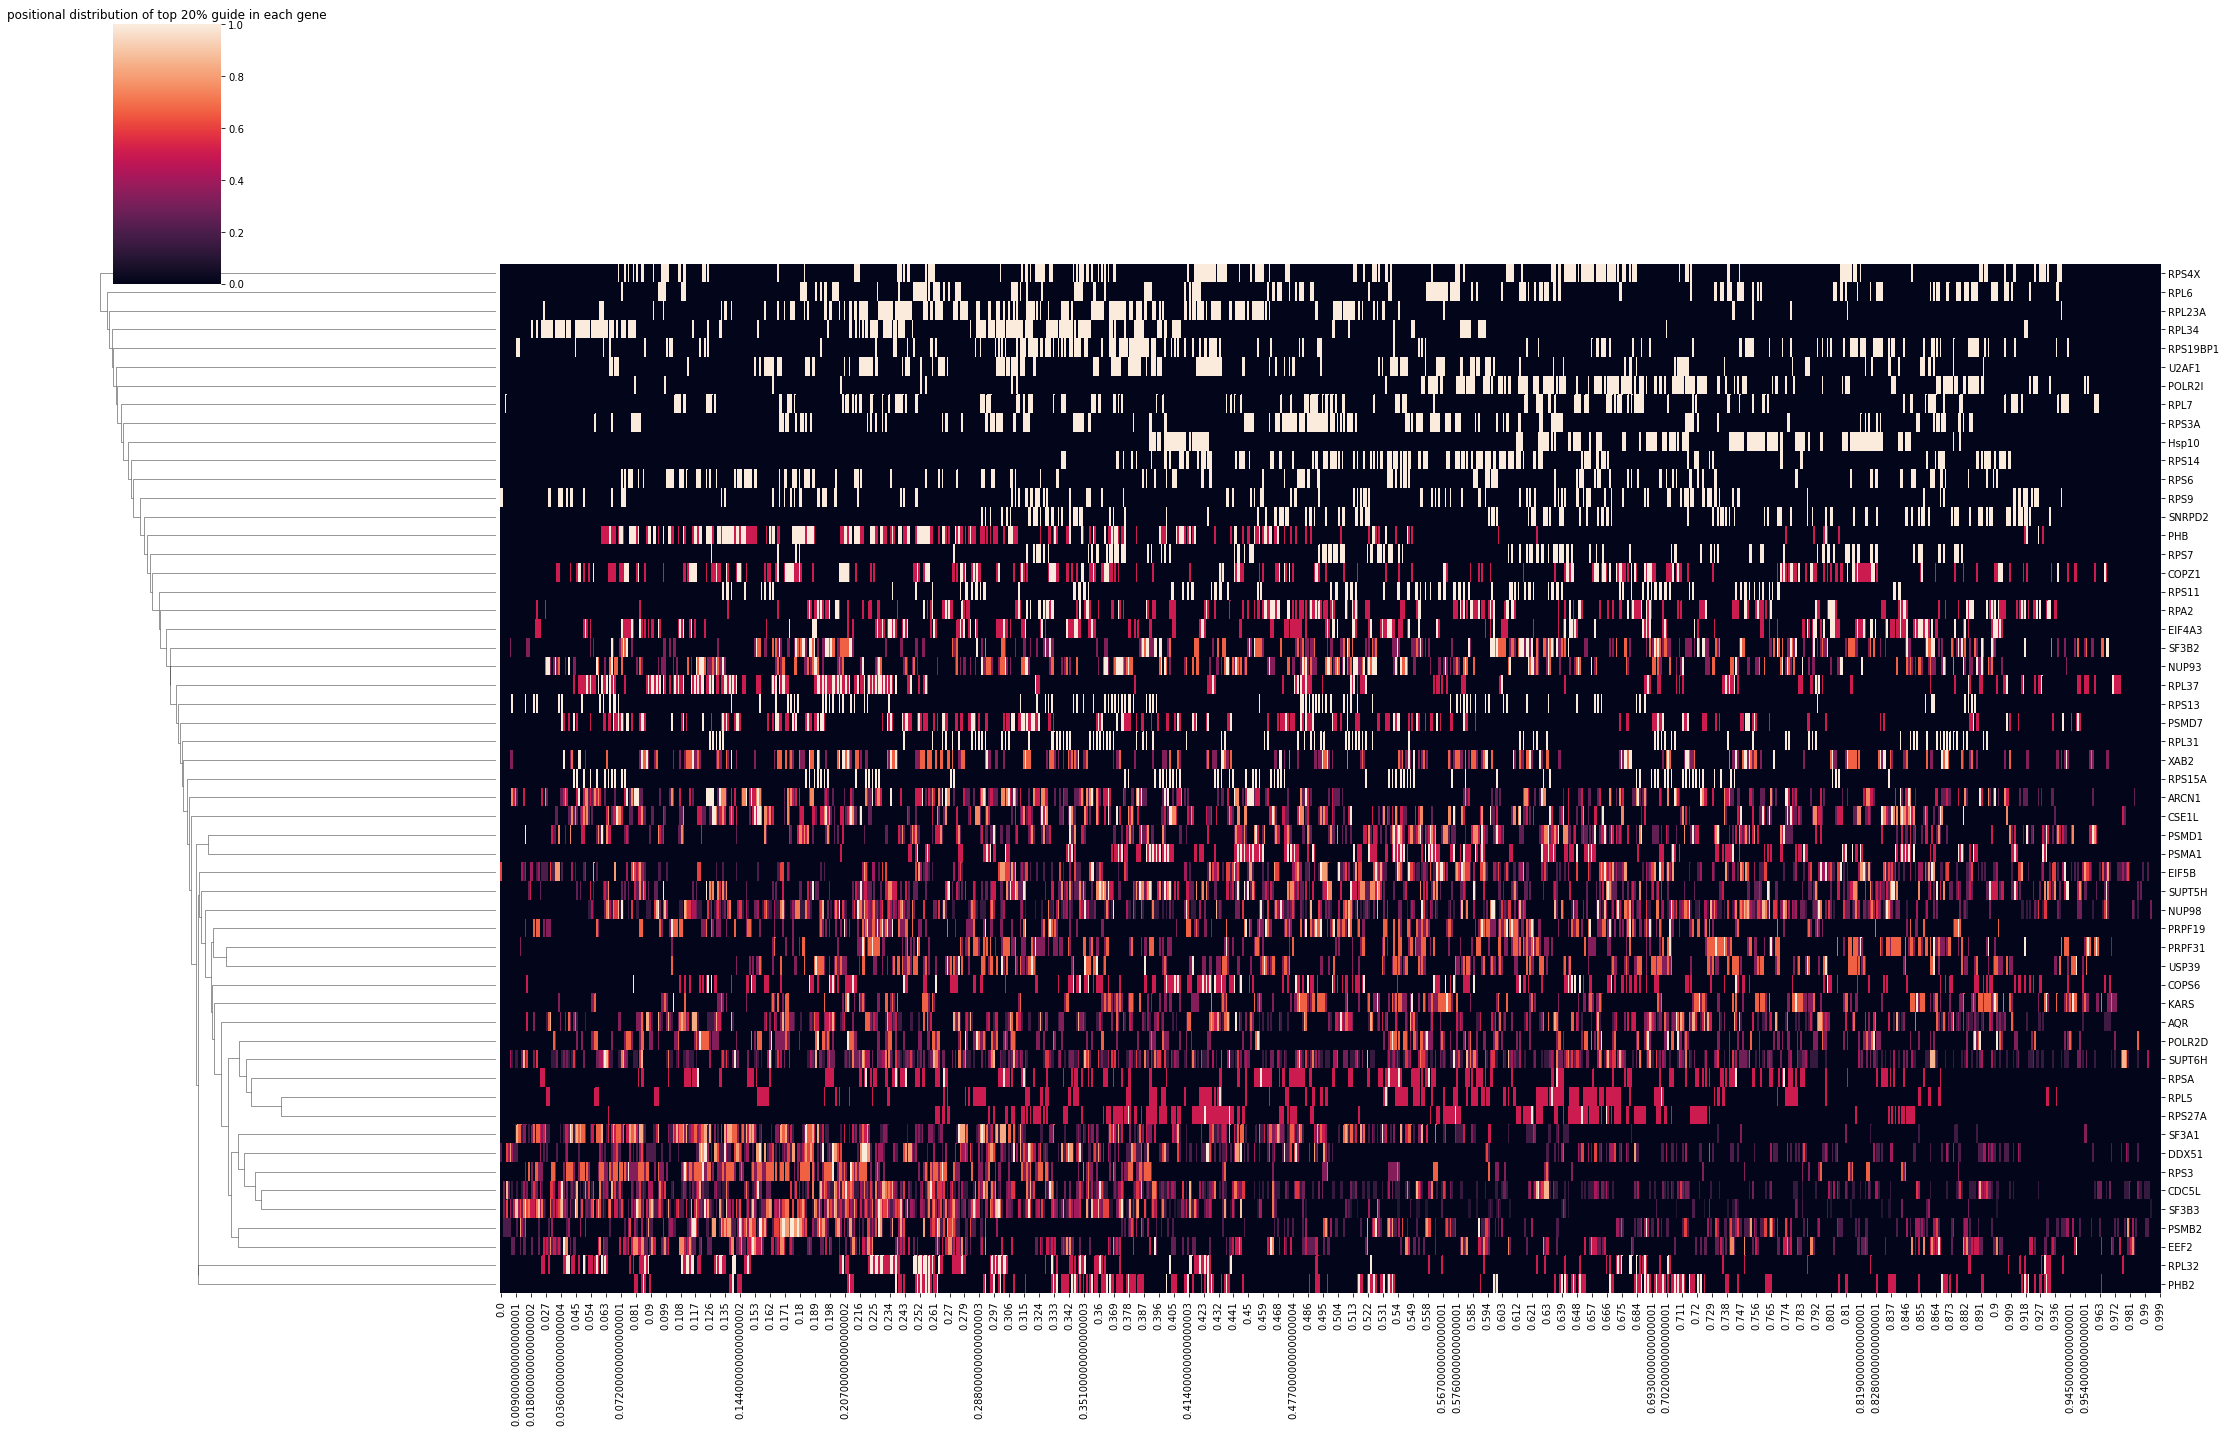

In [10]:
#all transcripts

df_all_hist = pd.DataFrame(columns = np.linspace(0, 0.999, num=1000), index = genes)

#ratio top 20%
for t in genes:
    t_df_ratio_good = df_good[df_good['gene']==t]
    #t_df_gene_good = df_good_gene[df_good_gene['gene']==t]
    
    pos_normed = t_df_ratio_good['position'].values
    hist, bin_edges = np.histogram(pos_normed,bins=np.linspace(0, 1.0, num=1001))
    hist_normed = hist/max(hist)
    df_all_hist.loc[t] = hist_normed
    #print(hist_normed)
    #print(bin_edges)

#plt.figure(figsize=(25,20))
#sns.heatmap(df_all_hist.astype(float))
sns.clustermap(df_all_hist.astype(float),col_cluster=False, figsize=(30,20))
plt.title('positional distribution of top 20% guide (0.45 ratio cutoff)')
#plt.show()
plt.savefig("guide_clustering_ratio45_goodguide.svg",format="svg")

#gene top 20%
for t in genes:
    t_df_gene_good = df_good_gene[df_good_gene['gene']==t]    
    pos_normed = t_df_gene_good['position'].values
    hist, bin_edges = np.histogram(pos_normed,bins=np.linspace(0, 1.0, num=1001))
    hist_normed = hist/max(hist)
    df_all_hist.loc[t] = hist_normed
plt.clf()    
#plt.figure(figsize=(25,20))
#sns.heatmap(df_all_hist.astype(float))
sns.clustermap(df_all_hist.astype(float),col_cluster=False, figsize=(30,20))
plt.title('positional distribution of top 20% guide in each gene')
#plt.show()
plt.savefig("guide_clustering_gene_top20%_goodguide.svg",format="svg")

In [30]:
df_all_hist

,0.000000,0.010101,0.020202,0.030303,0.040404,0.050505,0.060606,0.070707,0.080808,0.090909,...,0.909091,0.919192,0.929293,0.939394,0.949495,0.959596,0.969697,0.979798,0.989899,1.000000
RPS14,0,0,0.125,0.125,0,0,0,0,0,0,...,0.875,0.125,0,0,0,0,0,0,0,0
CDC5L,0,0,0,0.464286,0.25,0.214286,0.285714,0.0714286,0,0.25,...,0,0.0357143,0,0,0,0,0,0,0,0
POLR2I,0,0,0,0,0,0,0,0,0,0,...,0,0,0.333333,0,0,0.222222,0,0,0,0
RPS7,0,0,0,0,0,0,0,0,0.375,0,...,0,0,0,0,0,0,0,0,0,0
XAB2,0.0625,0,0,0.1875,0.5,0.0625,0.125,0,0.75,0.1875,...,0.1875,0.0625,0.0625,0.125,0.3125,0.25,0.125,0,0,0
RPS19BP1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RPL23A,0.1,0.4,0.6,0.2,0.3,0.1,0.3,0,0.2,0.6,...,0.1,0,0,0.4,0.2,0,0,0,0,0
SUPT6H,0,0.315789,0.210526,0,0.157895,0.315789,0.631579,0.526316,0.421053,0,...,0,0,0,0,0,0,0,0.0526316,0,0
PRPF31,0,0,0,0,0,0,0,0,0,0,...,0,0.0952381,0,0,0.380952,0.333333,0.333333,0,0,0
U2AF1,0,0,0,0,0,0,0.3,0.2,0,0,...,0,0,0.1,0,0,0,0,0,0,0


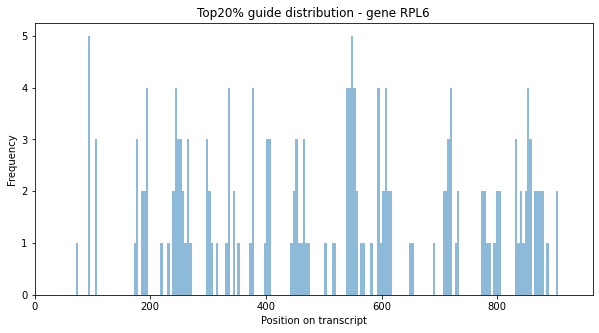

In [22]:
#select transcript and plot
t_df = dataframe[dataframe['gene']=='RPL6']
plt.figure(figsize=(10,5))
#pos = t_df['pos'].values
#relative_ratio = t_df['relative_ratio'].values
#plt.figure(figsize=(10,5))
#plt.scatter(pos,relative_ratio, marker='.')
t_df_good = t_df[t_df['binary_relative_ratio']==1]
t_df_good['pos'].plot.hist(by='pos',bins=200, alpha=0.5)
plt.xlabel('Position on transcript')
plt.xlim(0,965)
plt.title('Top20% guide distribution - gene RPL6')
#plt.show()
plt.savefig("guide_clustering-RPL6.svg",format="svg")

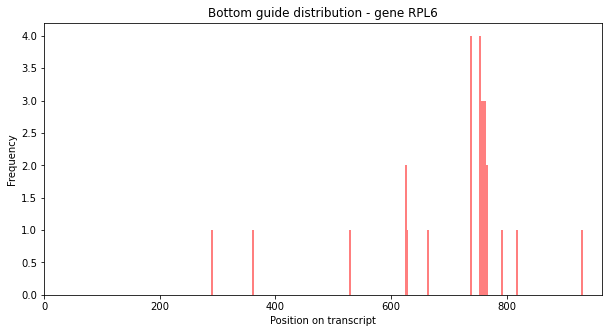

In [20]:
#bad guides
plt.figure(figsize=(10,5))
t_df_bad = t_df[t_df['raw ratio']>2]
t_df_bad['pos'].plot.hist(by='pos',bins=200, color="r",alpha=0.5)
plt.xlim(0,965)
plt.xlabel('Position on transcript')
plt.title('Bottom guide distribution - gene RPL6')
#plt.show()
plt.savefig("guide_clustering-badg_RPL6.svg",format="svg")

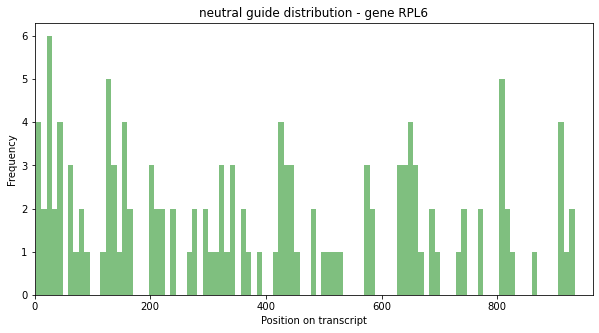

In [23]:
#neutral guides
plt.figure(figsize=(10,5))
t_df_bad = t_df[(t_df['raw ratio']<1.3) & (t_df['raw ratio']>1.07)]
t_df_bad['pos'].plot.hist(by='pos',bins=100, color="g",alpha=0.5)
plt.xlabel('Position on transcript')
plt.xlim(0,965)
plt.title('neutral guide distribution - gene RPL6')
#plt.show()
plt.savefig("guide_clustering-neutralg_RPL6.svg",format="svg")

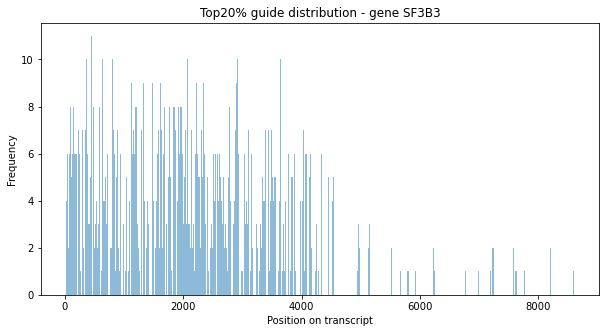

In [10]:
t_df = dataframe[dataframe['gene']=='SF3B3']
plt.figure(figsize=(10,5))
t_df_good = t_df[t_df['binary_relative_ratio']==1]
t_df_good['pos'].plot.hist(by='pos',bins=800, alpha=0.5)
plt.xlabel('Position on transcript')
plt.title('Top20% guide distribution - gene SF3B3')
#plt.show()
plt.savefig("guide_clustering-goodg_SF3B3.svg",format="svg")

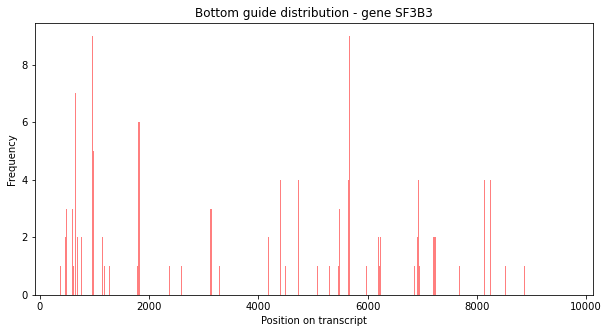

In [8]:
#bad guides
plt.figure(figsize=(10,5))
t_df_bad = t_df[t_df['raw ratio']>2.5359]
t_df_bad['pos'].plot.hist(by='pos',bins=800, color="r",alpha=0.5)
plt.xlabel('Position on transcript')
plt.title('Bottom guide distribution - gene SF3B3')
#plt.show()
plt.savefig("guide_clustering-badg_SF3B3.svg",format="svg")

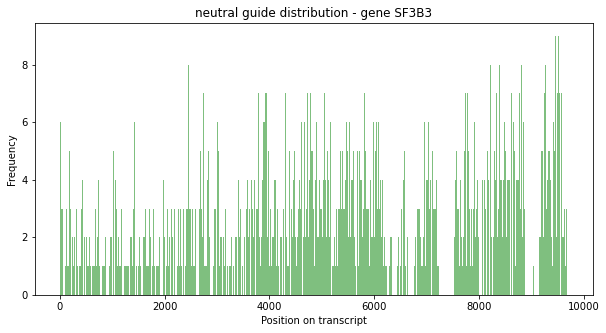

In [11]:
#neutral guides
plt.figure(figsize=(10,5))
t_df_bad = t_df[(t_df['raw ratio']<1.3) & (t_df['raw ratio']>1.07)]
t_df_bad['pos'].plot.hist(by='pos',bins=800, color="g",alpha=0.5)
plt.xlabel('Position on transcript')
plt.title('neutral guide distribution - gene SF3B3')
#plt.show()
plt.savefig("guide_clustering-neutralg_SF3B3.svg",format="svg")

In [7]:
np.linspace(0, 0.999, num=1000)

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107,
       0.108, 0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116,
       0.117, 0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125,
       0.126, 0.127,